In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer

In [ ]:
df = pd.read_csv("/content/Data_to_Transform.csv")
print(df)

      Moderate Positive Skew  Highly Positive Skew  Moderate Negative Skew  \
0                   0.899990              2.895074               11.180748   
1                   1.113554              2.962385               10.842938   
2                   1.156830              2.966378               10.817934   
3                   1.264131              3.000324               10.764570   
4                   1.323914              3.012109               10.753117   
...                      ...                   ...                     ...   
9995               14.749050             16.289513               -2.980821   
9996               14.854474             16.396252               -3.147526   
9997               15.262103             17.102991               -3.517256   
9998               15.269983             17.628467               -4.689833   
9999               16.204517             18.052331               -6.335679   

      Highly Negative Skew  
0                 9.027485  
1    

In [ ]:
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296


In [ ]:
df.isnull().sum()

Moderate Positive Skew    0
Highly Positive Skew      0
Moderate Negative Skew    0
Highly Negative Skew      0
dtype: int64

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Moderate Positive Skew  10000 non-null  float64
 1   Highly Positive Skew    10000 non-null  float64
 2   Moderate Negative Skew  10000 non-null  float64
 3   Highly Negative Skew    10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.000000,6.000000,6.000000,6.000000
std,2.047237,1.882685,2.045060,1.860556
min,0.899990,2.895074,-6.335679,-7.036091
25%,4.518431,4.614818,4.779235,5.049961
50%,5.751642,5.634956,6.233932,6.360402
75%,7.258956,6.924035,7.465319,7.366753
max,16.204517,18.052331,11.180748,9.027485


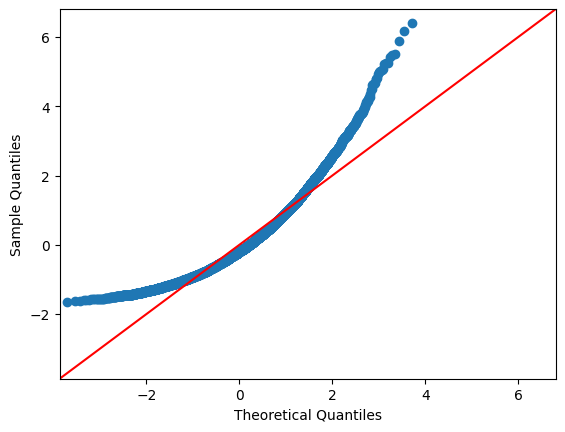

In [ ]:
df1 = df.copy()
sm.qqplot(df1['Highly Positive Skew'],fit=True,line='45')
plt.show()

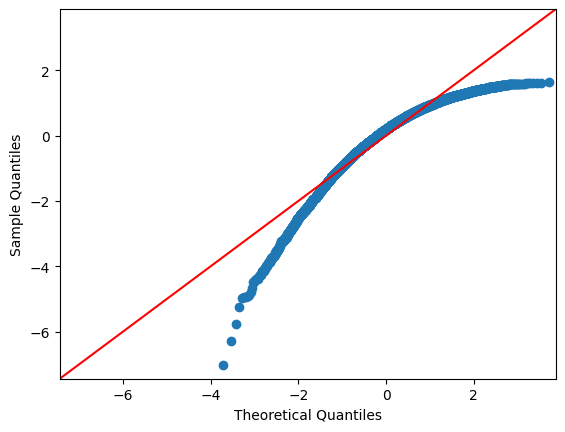

In [ ]:
sm.qqplot(df1['Highly Negative Skew'],fit=True,line='45')
plt.show()

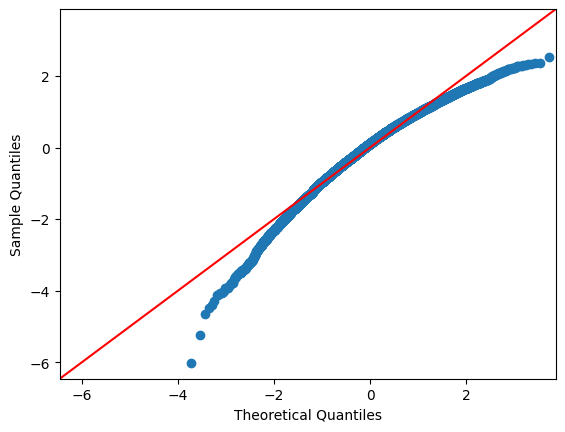

In [ ]:
sm.qqplot(df1['Moderate Negative Skew'],fit=True,line='45')
plt.show()

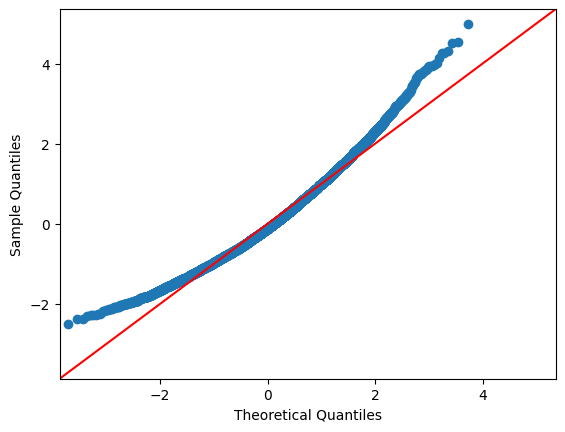

In [ ]:
sm.qqplot(df1['Moderate Positive Skew'],fit=True,line='45')
plt.show()

# **Log Transformation**

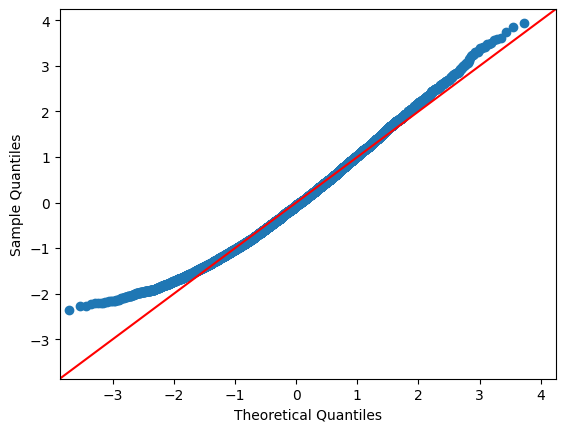

In [ ]:
df1['Highly Positive Skew'] = np.log(df1['Highly Positive Skew'])
sm.qqplot(df1['Highly Positive Skew'],fit=True,line='45')
plt.show()


# **Reciprocal Tranformation**

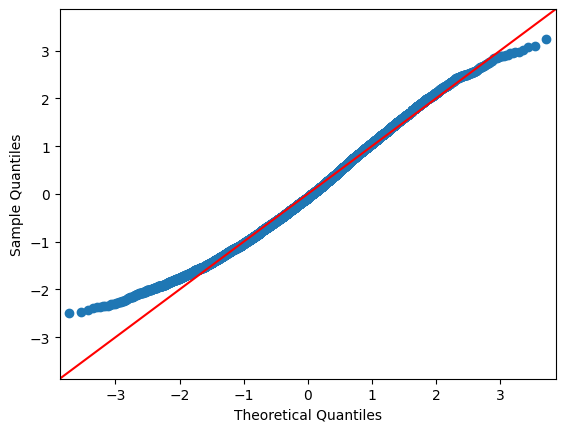

In [ ]:
df2 = df.copy()
df2['Highly Positive Skew'] = 1/df2['Highly Positive Skew']
sm.qqplot(df2['Highly Positive Skew'],fit=True,line='45')
plt.show()


# **Square Root Tranformation**

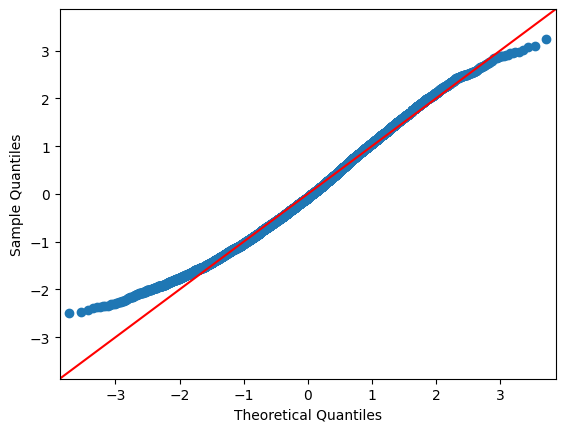

In [ ]:
df3 = df.copy()
df3['HighlyPositiveSkew'] = df3['Highly Positive Skew']**(1/1.2)
sm.qqplot(df2['Highly Positive Skew'],fit=True,line='45')
plt.show()

# **Power Transformation**

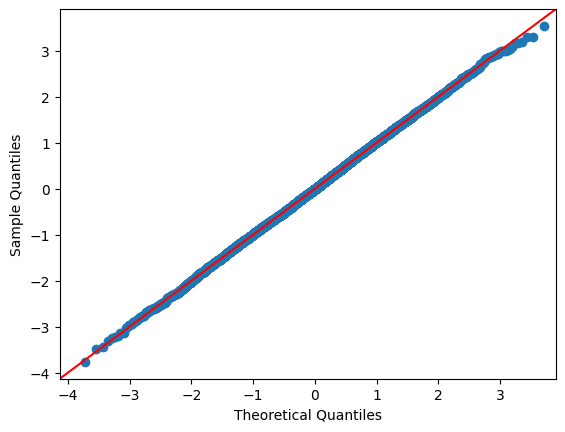

In [ ]:
df4 = df.copy()
df4['Moderate Positive Skew_1'],parameters =stats.yeojohnson(df4['Moderate Positive Skew'])
sm.qqplot(df4['Moderate Positive Skew_1'],fit=True,line='45')
plt.show()


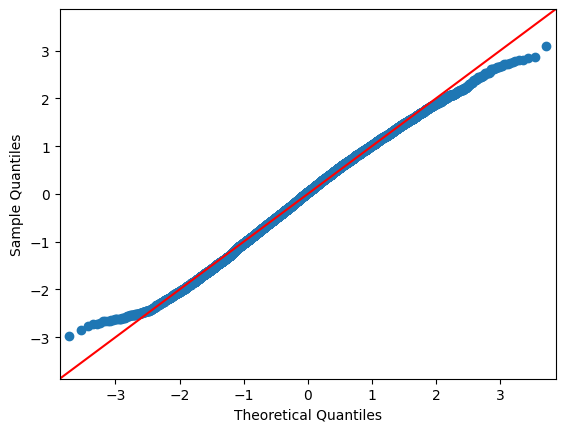

In [ ]:
from sklearn.preprocessing import PowerTransformer 
trans = PowerTransformer("yeo-johnson")
df5 = df.copy()
df5['Moderate Negative Skew_1'] =pd.DataFrame(trans.fit_transform(df5[['Moderate Negative Skew']]))
sm.qqplot(df5['Moderate Negative Skew_1'],line='45')
plt.show()

# **Quantile Transformation**

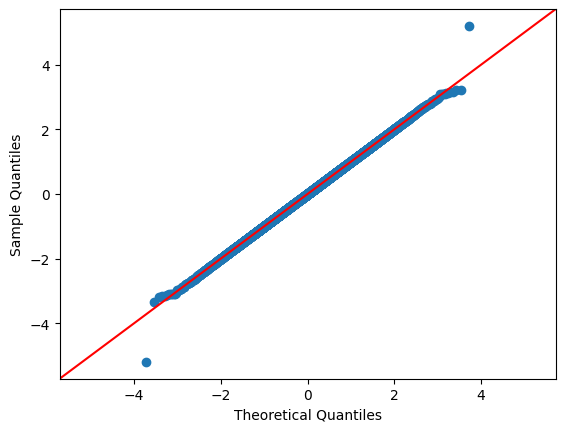

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution = 'normal')
df5['Moderate Negative Skew_2'] =pd.DataFrame(qt.fit_transform(df5[['Moderate Negative Skew']]))
sm.qqplot(df5['Moderate Negative Skew_2'],line='45')
plt.show()
